In [1]:
import sqlite3

In [2]:
import pandas as pd

In [3]:
conn = sqlite3.connect('data_input/chinook.db')

In [4]:
# Static Endpoints 1
data = pd.read_sql_query(
    '''
    SELECT artists.Name AS ArtistName, albums.Title,
    customers.Country, genres.Name AS GenreName,
    media_types.Name AS MediaType, invoices.InvoiceDate AS DatePurchased,
    invoices.Total AS Total
    FROM customers
    LEFT JOIN invoices
    ON customers.CustomerId = invoices.CustomerId
    LEFT JOIN invoice_items
    ON invoices.InvoiceId = invoice_items.InvoiceId
    LEFT JOIN tracks
    ON invoice_items.TrackId = tracks.TrackId
    LEFT JOIN genres
    ON tracks.GenreId = genres.GenreId
    LEFT JOIN media_types
    ON tracks.MediaTypeId = media_types.MediaTypeId
    LEFT JOIN albums
    ON tracks.AlbumId = albums.AlbumId
    LEFT JOIN artists
    ON albums.ArtistId = artists.ArtistId
    ORDER BY Total DESC
    ''',
    conn,
    parse_dates='DatePurchased'
)
data['MonthPurchased'] = data['DatePurchased'].dt.month_name()
data

,ArtistName,Title,Country,GenreName,MediaType,DatePurchased,Total,MonthPurchased
0,Titãs,Volume Dois,Czech Republic,Alternative & Punk,MPEG audio file,2013-11-13,25.86,November
1,Battlestar Galactica,"Battlestar Galactica, Season 3",Czech Republic,TV Shows,Protected MPEG-4 video file,2013-11-13,25.86,November
2,Battlestar Galactica,"Battlestar Galactica, Season 3",Czech Republic,Science Fiction,Protected MPEG-4 video file,2013-11-13,25.86,November
3,Heroes,"Heroes, Season 1",Czech Republic,Drama,Protected MPEG-4 video file,2013-11-13,25.86,November
4,Heroes,"Heroes, Season 1",Czech Republic,Drama,Protected MPEG-4 video file,2013-11-13,25.86,November
...,...,...,...,...,...,...,...,...
2235,Gene Krupa,Up An' Atom,United Kingdom,Jazz,MPEG audio file,2013-01-15,0.99,January
2236,Creedence Clearwater Revival,"Chronicle, Vol. 1",United Kingdom,Rock,MPEG audio file,2009-03-22,0.99,March
2237,Kiss,Greatest Kiss,Australia,Rock,MPEG audio file,2010-05-30,0.99,May
2238,Bruce Dickinson,Chemical Wedding,Argentina,Metal,MPEG audio file,2011-08-07,0.99,August


In [5]:
# Static Endpoints 2 
data_mediatype = data.groupby(['MediaType', 'MonthPurchased']).sum().sort_values(by='Total', ascending=False).unstack().fillna(0)
data_mediatype

Total                                      \
MonthPurchased                 April   August December February  January   
MediaType                                                                  
AAC audio file                  0.00     0.00     0.00     0.00     0.00   
MPEG audio file              1466.85  1565.59  1624.59  1543.89  1547.87   
Protected AAC audio file       90.09     8.91    47.52    13.86    15.84   
Protected MPEG-4 video file   264.34   238.60     1.99   176.87   262.43   
Purchased AAC audio file        9.90     0.00     0.00     0.00     0.00   

                                                                          \
MonthPurchased                  July     June    March      May November   
MediaType                                                                  
AAC audio file                  0.00    15.86    15.86     0.00     0.00   
MPEG audio file              1577.21  1355.35  1397.94  1633.95  1283.28   
Protected AAC audio file       92.07   251.72   246.75    14.85    53.46   
Protected MPEG-4 video file    21.82   103.31    57.55    94.30   310.32   
Purchased AAC audio file        0.00    15.86     0.00     0.00     0.00   

                                                
MonthPurchased               October September  
MediaType                                       
AAC audio file                 16.86      0.00  
MPEG audio file              1380.18   1461.57  
Protected AAC audio file      263.66     61.38  
Protected MPEG-4 video file    72.40    171.97  
Purchased AAC audio file        0.00      0.00

In [6]:
# Dynamic Endpoints - writen on python
artistname = data[data['ArtistName'] == artistname]

NameError: name 'artistname' is not defined

Bussiness question?

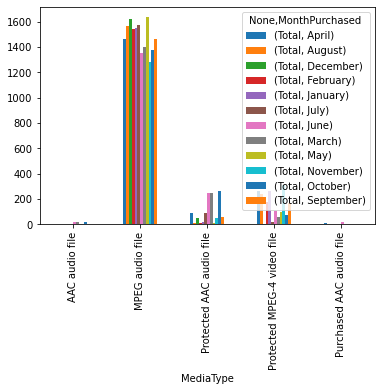

In [7]:
data_mediatype.plot(kind='bar')

In [8]:
data['ArtistName'].unique()

array(['Titãs', 'Battlestar Galactica', 'Heroes', 'Lost', 'U2',
       'Velvet Revolver', 'Vinícius De Moraes', 'Lenny Kravitz',
       'Zeca Pagodinho', 'The Office', 'Battlestar Galactica (Classic)',
       'Van Halen', 'House Of Pain', 'O Rappa', 'The Posies',
       'Temple of the Dog', 'Chris Cornell', 'Audioslave', 'Yo-Yo Ma',
       'Sir Georg Solti & Wiener Philharmoniker',
       'Habib Koité and Bamada', 'English Concert & Trevor Pinnock',
       'Royal Philharmonic Orchestra & Sir Thomas Beecham',
       'Eugene Ormandy', 'Chicago Symphony Orchestra & Fritz Reiner',
       'Edo de Waart & San Francisco Symphony',
       'Luciana Souza/Romero Lubambo', 'Scholars Baroque Ensemble',
       'Academy of St. Martin in the Fields, John Birch, Sir Neville Marriner & Sylvia McNair',
       'Maurizio Pollini',
       'Michael Tilson Thomas & San Francisco Symphony', 'Amy Winehouse',
       'Chico Science & Nação Zumbi', 'Cidade Negra', 'Cláudio Zoli',
       'Various Artists', 'Led Ze

In [9]:
data['ArtistName'].value_counts()

Iron Maiden                                     140
U2                                              107
Metallica                                        91
Led Zeppelin                                     87
Os Paralamas Do Sucesso                          45
                                               ... 
Maurizio Pollini                                  1
Berliner Philharmoniker & Hans Rosbaud            1
Kent Nagano and Orchestre de l'Opéra de Lyon      1
The King's Singers                                1
Yo-Yo Ma                                          1
Name: ArtistName, Length: 165, dtype: int64

In [10]:
data['ArtistName'] = data['ArtistName'].astype('category')

In [17]:
artist_list = pd.read_sql_query(
    '''
    SELECT artists.Name as ArtistName, albums.Title, genres.Name as GenreName 
    FROM artists
    LEFT JOIN albums  
    ON artists.ArtistId = albums.ArtistId
    LEFT JOIN tracks
    ON albums.AlbumId = tracks.AlbumId
    LEFT JOIN genres
    ON tracks.GenreId = genres.GenreId
    ''',
    conn
)
artist_list

,ArtistName,Title,GenreName
0,AC/DC,For Those About To Rock We Salute You,Rock
1,AC/DC,For Those About To Rock We Salute You,Rock
2,AC/DC,For Those About To Rock We Salute You,Rock
3,AC/DC,For Those About To Rock We Salute You,Rock
4,AC/DC,For Those About To Rock We Salute You,Rock
...,...,...,...
3569,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp","Locatelli: Concertos for Violin, Strings and C...",Classical
3570,Emerson String Quartet,Schubert: The Late String Quartets & String Qu...,Classical
3571,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...",Monteverdi: L'Orfeo,Classical
3572,Nash Ensemble,Mozart: Chamber Music,Classical


In [25]:
artist_list.dtypes

ArtistName    category
Title           object
GenreName     category
dtype: object

In [24]:
artist_list['ArtistName'] = artist_list['ArtistName'].astype('category')
artist_list['GenreName'] = artist_list['GenreName'].astype('category')

In [27]:
artist_list['Title'].value_counts()

Greatest Hits                                     57
Minha Historia                                    34
Unplugged                                         30
Lost, Season 3                                    26
Lost, Season 1                                    25
                                                  ..
Beethoven Piano Sonatas: Moonlight & Pastorale     1
Respighi:Pines of Rome                             1
Scheherazade                                       1
Great Opera Choruses                               1
Mozart: Wind Concertos                             1
Name: Title, Length: 347, dtype: int64

In [31]:
data.groupby(['MediaType', 'MonthPurchased']).sum().sort_values(by='Total', ascending=False).unstack().fillna(0).melt()

,NaN,MonthPurchased,value
0,Total,April,0.00
1,Total,April,1466.85
2,Total,April,90.09
3,Total,April,264.34
4,Total,April,9.90
5,Total,August,0.00
6,Total,August,1565.59
7,Total,August,8.91
8,Total,August,238.60
9,Total,August,0.00
